In [22]:
#Descripción del proyecto
#"""Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos,
#los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas.

#Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.
#Delante de ti hay datos que se remontan a 2016. Imaginemos que es diciembre de 2016 y estás planeando una campaña para 2017.

#Lo importante es adquirir experiencia de trabajo con datos. Realmente no importa si estás pronosticando las ventas de 2017 en función de los datos de 2016 o las ventas de 2027
#en función de los datos de 2026.
# El dataset contiene una columna "rating" que almacena la clasificación ESRB de cada juego.
#El Entertainment Software Rating Board (la Junta de clasificación de software de entretenimiento) evalúa el contenido de un juego y asigna una clasificación de edad como Adolescente
#o Adulto."""

### Paso 1. Abre el archivo y estudia la informacion general.

In [23]:
#Importacion de librerias

# Análisis de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns
#Estadisticas
from scipy import stats as st
#Carga del Dataset
df=pd.read_csv('/home/jdt480/Documents/PERSONAL/TripleTen/Sprint6/Proyecto/datasets/games.csv')
print(df.head())
print('================================================================')
df.info()

                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 

Tengo un total de columnas de 10, y el rango index de 16715.

0. **NAME :** 2 valores vacios
1. **PLATAFORM :** COMPLETO
2. **YEAR_OF_RELEASE :** es flotante y faltan valores
3. **GENRE :** faltan valores
4. **NA_SALES :** completo flotante 
5. **EU_sales :** completo flotante
6. **JP_sales :** completo flotante
7. **Other_sales :** completo flotante
8. **Critic_Score :** Faltan datos flotante
9. **User_Score :** Faltan datos string
10. **Rating :** Faltan datos string
### __Pasos a arreglar el dataset__
1. **Name :** Manejo de nulos colocar unknown
2. **Year_of_release :** Manejo de nulos, colocar de typo entero
3. **Genre :** Manejo de nulos
4. **Sales :** Crear una nueva columna ventas totales
5. **Critic_score :** Tratar los nulos 
6. **User_score :** Arreglar el valor tbd por NAN, convertir a flotante
7. **Rating :** Tratar los nulos

In [24]:
#Colocamos en minusculas los nombres de las columnas

print(df.columns)
df.columns=df.columns.str.lower()
print(list(df.columns))# Se cambia a minusculas todos los nombres de columna 

#==========================COLUMNA NAME=================================================

df_name_null=df[df['name'].isnull()]
print(df_name_null)

# las finlas 659 y 14244 son NaN no es un numero o dato faltante 
df['name']=df['name'].fillna('unknown')#rellenamos los valores faltantes d ela columna name
df['name'].isna().sum()# verificamos que no hallan valores vacios 

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')
['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']
      name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


np.int64(0)

In [25]:
#============================YEAR OF RELEASE=============================================
#print(df[df['year_of_release'].isna()])
print('Valores NaN')
print(df['year_of_release'].isna().sum())# hay valores sin ano de lanzamiento pero no se
                                        #  elimina por el la cantidad de datos 
df['year_of_release']=df['year_of_release'].astype('Int64')# int64 cambia el tipo asi haya
                                                            # valores NaN

Valores NaN
269


In [26]:
#==================================GRENRE==============================================
df[df['genre'].isna()]#verifico las filas con valores ausentes
df['genre']=df['genre'].fillna('unknown')# remplazo con desconocido
df['genre'].isna().sum()# verifico que ya no hay valores vacios

np.int64(0)

In [27]:
#===============================TOTAL SALES==============================================
df['total_sales']=df['na_sales']+df['eu_sales'] +df['jp_sales'] +df['other_sales']
cols=list(df.columns)
col=cols.pop(11)
cols.insert(8,col)
df=df[cols]
list(df.columns)

['name',
 'platform',
 'year_of_release',
 'genre',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'total_sales',
 'critic_score',
 'user_score',
 'rating']

In [28]:
#=============================CRITIC_SCORE=============================================
df[df['critic_score'].isna()]
df['critic_score']=df['critic_score'].fillna(-1)# se coloca -1 para diferenciar de los que 
                                                # tengan un valor de 0 y analizarlos por separado
                                                

In [29]:
#================================USER SCORE===================================================
print('Numero de datos Faltantes: ',df['user_score'].isna().sum())# tenemos 6701 NaN antes de transformar
#El texto tbd no puede ser considerado por pandas como un valor faltante o nulo se 
# debe transformar para cambiar de tipo a la columna a entero 
# no se pasa tbd a NaN ya suma aproximadamente 3000 datos faltantes
# se coloca -1 para un posterior analisis 
df['user_score'] = df['user_score'].replace('tbd', -1.0)
print("Valores 'tbd' reemplazados con -1.")
#convertimos la columna numerica
df['user_score'] = pd.to_numeric(df['user_score'])
#df['user_score']=df['user_score'].astype('Int64')
print('Tipo de dato actual:', df['user_score'].dtype)
print('Número de NaN originales (sin tbd):', df['user_score'].isna().sum()) 

# Para ver cuántos juegos quedaron con el marcador -1.0:
print('Número de juegos con marcador -1.0 (antes "tbd"):', df[df['user_score'] == -1.0].shape[0])


Numero de datos Faltantes:  6701
Valores 'tbd' reemplazados con -1.
Tipo de dato actual: float64
Número de NaN originales (sin tbd): 6701
Número de juegos con marcador -1.0 (antes "tbd"): 2424


In [30]:
#==============================RATING=========================================
print('Numero de datos Faltantes: ',df['rating'].isna().sum())
df['rating']=df['rating'].fillna('unknown')
print('Remplazamos NaN con unknown.')
print('Numero de datos Faltantes: ',df['rating'].isna().sum())

Numero de datos Faltantes:  6766
Remplazamos NaN con unknown.
Numero de datos Faltantes:  0


## Paso 3. Analiza los datos
1. Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
2. Observa cómo varían las ventas de una plataforma a otra. Elige las plataformas con las mayores ventas totales y construye una distribución basada en los datos de cada año. Busca las plataformas que solían ser populares pero que ahora no tienen ventas. ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
3. Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.
4. Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.
5. ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.
6. Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.
7. Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.
8. Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.
9. Echa un vistazo a la distribución general de los juegos por género. ¿Qué se puede decir de los géneros más rentables? ¿Puedes generalizar acerca de los géneros con ventas altas y bajas?

Agrupacion de juegos por an'os


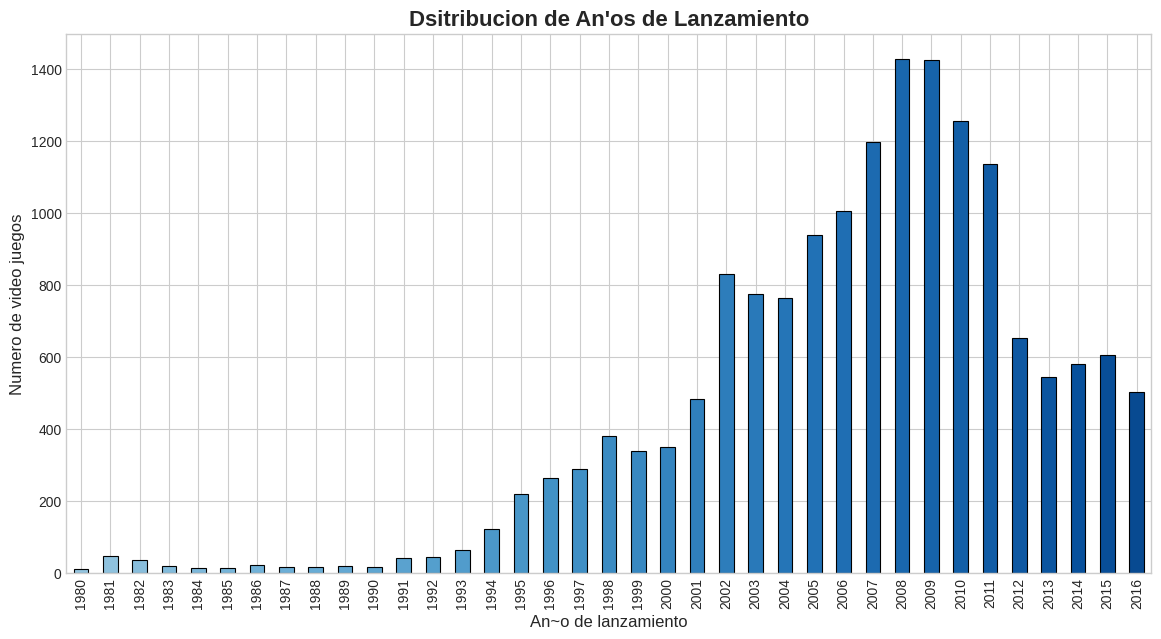

In [31]:
#============================== 3.1 JUEGOS LANZADOS EN DIFERENTES AN'OS==========================

print("Agrupacion de juegos por an'os")
#agrupamos por ano de lanzamiento y contamos cuantos nombres hay en ese an'o
group_by_year=df.groupby('year_of_release')['name'].count()
#Graficamos en el eje x year y el 'y' el numero de juegos 
#Configuramos el estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14,7))
#Configuramos la grafica
ax=group_by_year.plot(kind='bar',
                      color=plt.cm.Blues(np.linspace(0.4, 0.9, len(group_by_year))),
                      edgecolor='black',
                      linewidth=0.8)
ax.set_title("Dsitribucion de An'os de Lanzamiento",fontsize=16,fontweight='bold')
ax.set_xlabel("An~o de lanzamiento",fontsize=12)
ax.set_ylabel("Numero de video juegos",fontsize=12)
plt.show()


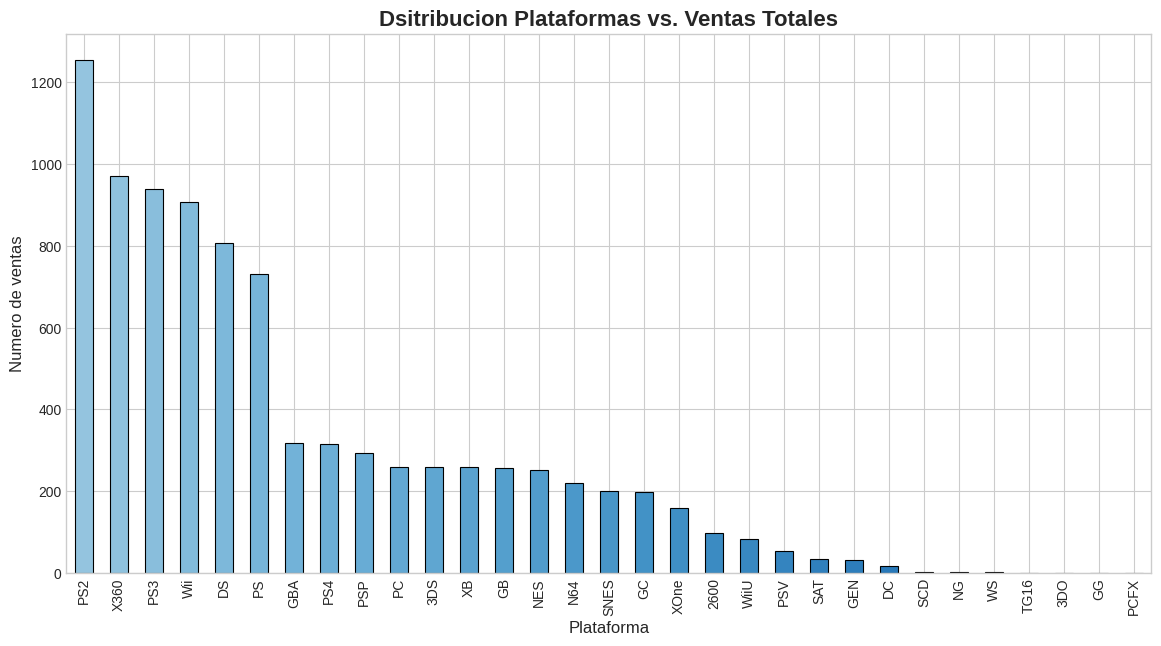

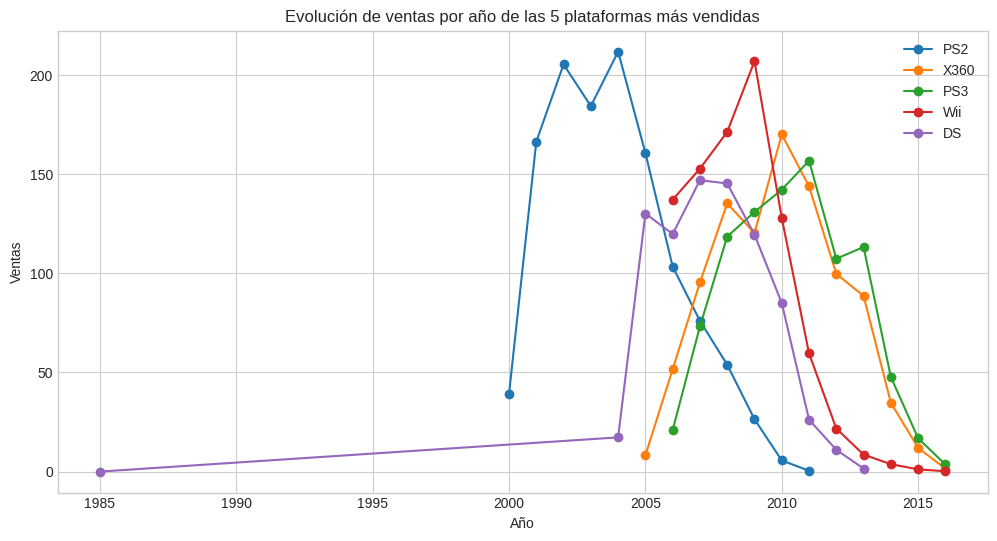

Plataformas fuera del mercado: 
['PS2', 'DS', 'PS', 'GBA', 'PSP', 'XB', 'GB', 'NES', 'N64', 'SNES']


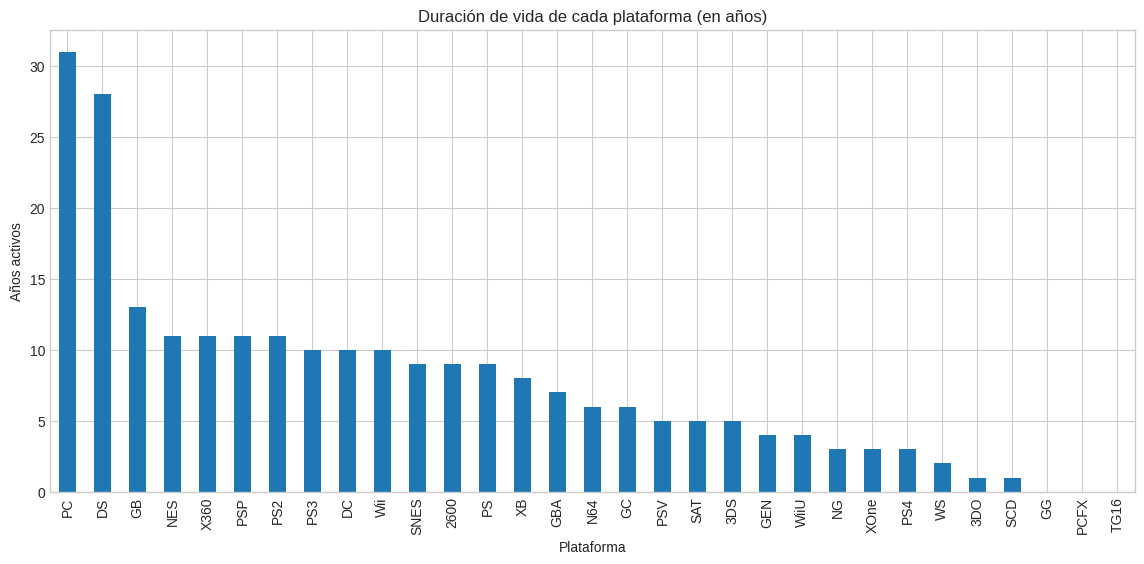

In [32]:
#========================= 3.2 Ventas entre plataformas================================
#Observa cómo varían las ventas de una plataforma a otra. 
# Elige las plataformas con las mayores ventas totales y construye una 
# distribución basada en los datos de cada año.
# Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
# ¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
group_by_plataform=df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
#print(group_by_plataform)
#Graficamos en el eje x year y el 'y' el numero de juegos 
#Configuramos el estilo
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(14,7))
#Configuramos la grafica
ax=group_by_plataform.plot(kind='bar',
                      color=plt.cm.Blues(np.linspace(0.4, 0.9, len(group_by_year))),
                      edgecolor='black',
                      linewidth=0.8)
ax.set_title("Dsitribucion Plataformas vs. Ventas Totales",fontsize=16,fontweight='bold')
ax.set_xlabel("Plataforma",fontsize=12)
ax.set_ylabel("Numero de ventas",fontsize=12)
plt.show()
#============================================================================================

#agrupamos por plataforma y ano, y sumamos sus ventas totales, convertimos en un dataframe 
# por el index
sales_for_year=df.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
#tomamos las 5 plataformas con mas ventas 
top5 = group_by_plataform.head(5).index
#filtramos   las 5 plataformas del dataframe de ventas por an'o
#isin()--> revisa si el top5 esta en el dataframe, solo devuelve los 5 que estan = true
df_top5 = sales_for_year[sales_for_year['platform'].isin(top5)]
#Creamos el grafico
plt.figure(figsize=(12,6))

for plat in top5:#si la plataforma esta en el top 5
    temp = df_top5[df_top5['platform'] == plat]#filtramos solo la plataforma
    plt.plot(temp['year_of_release'], temp['total_sales'], marker='o', label=plat)

plt.title("Evolución de ventas por año de las 5 plataformas más vendidas")
plt.xlabel("Año")
plt.ylabel("Ventas")
plt.legend()
plt.grid(True)
plt.show()
#=============================================================================================
#buscar plataformar que antes tenian ventas y ahora no , por el an'o antiguo
# Último año disponible
last_year = sales_for_year['year_of_release'].max()
# Ventas del último año
ventas_ultimo = sales_for_year[sales_for_year['year_of_release'] == last_year]
# Plataformas presentes ese año
plataformas_en_ultimo_anio = ventas_ultimo['platform'].unique()
# Todas las plataformas
todas_las_plataformas = sales_for_year['platform'].unique()
# Plataformas que ya no existen en el último año
plataformas_desaparecidas = [p for p in todas_las_plataformas 
                             if p not in plataformas_en_ultimo_anio]
# Plataformas populares antes (umbral)
populares_antes = group_by_plataform[group_by_plataform > 200].index
# Las que fueron populares y hoy están desaparecidas
extintas = [p for p in populares_antes if p in plataformas_desaparecidas]
print('Plataformas fuera del mercado: ')
print(extintas)
#=======================================================================================
#¿Cuánto tardan generalmente las nuevas plataformas en aparecer y las antiguas en desaparecer?
vida_plataformas = sales_for_year.groupby('platform')['year_of_release'].agg(['min','max'])
vida_plataformas['duracion'] = vida_plataformas['max'] - vida_plataformas['min']
vida_plataformas
vida_plataformas['duracion'].sort_values(ascending=False).plot(kind='bar', figsize=(14,6))
plt.title("Duración de vida de cada plataforma (en años)")
plt.ylabel("Años activos")
plt.xlabel("Plataforma")
plt.grid(True)
plt.show()


### Paso 3.3 Determina para qué período debes tomar datos. Para hacerlo mira tus respuestas a las preguntas anteriores. Los datos deberían permitirte construir un modelo para 2017.

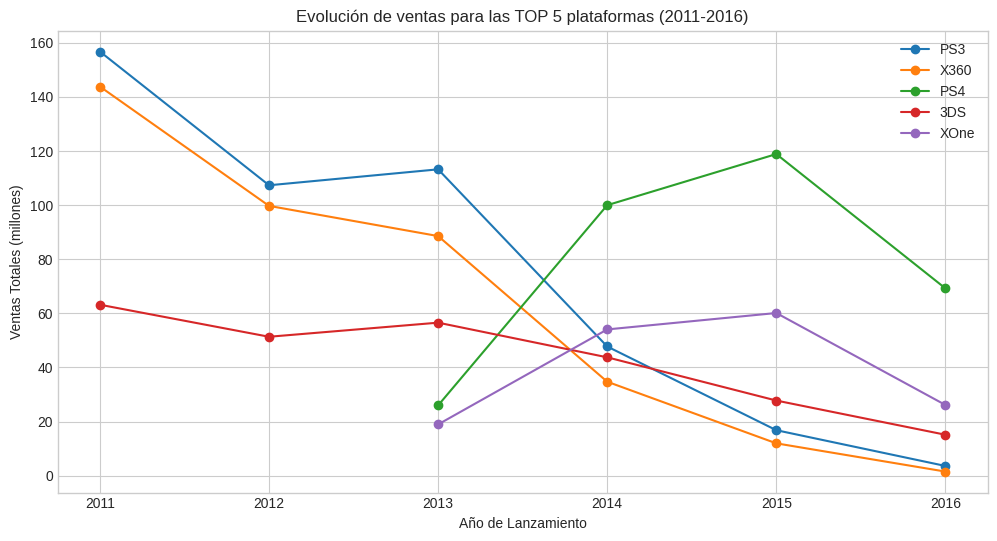

In [33]:
# Código corregido y ejecutado:
df.columns = df.columns.str.lower()
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

begin_year = 2011
final_year = 2016
df_current = df[(df['year_of_release'] >= begin_year) & (df['year_of_release'] <= final_year)].copy()

sales_current_platform = df_current.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_sales_platforms = sales_current_platform.head(5).index

evolution = df_current.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 6))
for platform in top_sales_platforms:
    temp = evolution[evolution['platform'] == platform]
    plt.plot(temp['year_of_release'], temp['total_sales'], marker='o', label=platform)

plt.title(f'Evolución de ventas para las TOP 5 plataformas ({begin_year}-{final_year})')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Ventas Totales (millones)')
plt.legend()

### Paso 3.4 Trabaja solo con los datos que consideras relevantes. Ignora los datos de años anteriores.

Diagrama de cajas


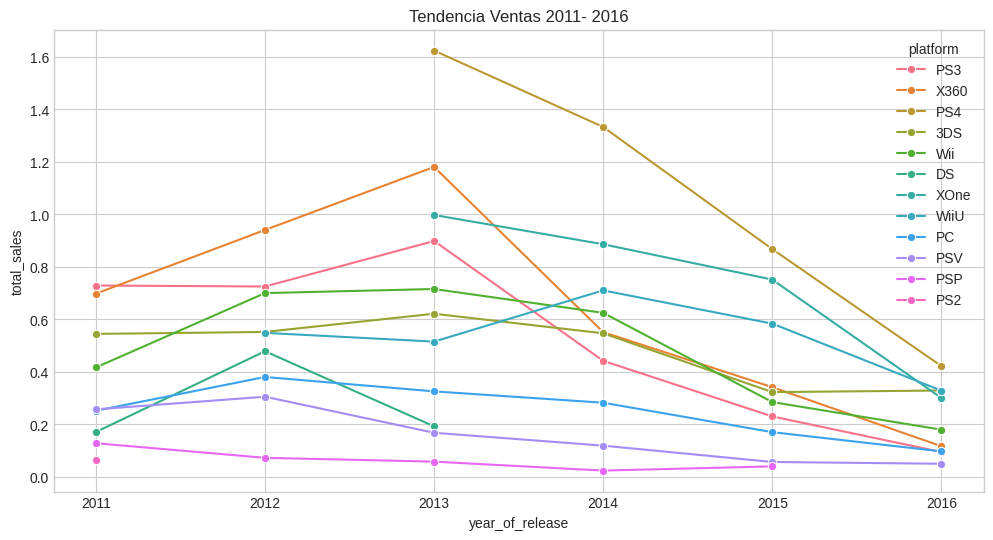

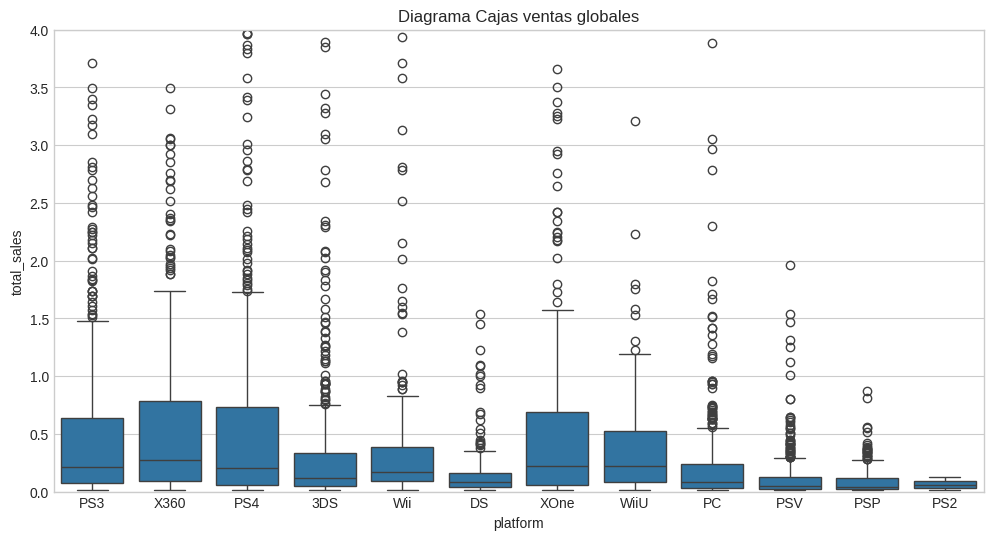

In [34]:
#Se trabajara con los datos filtrados del 2011 al 2016, 6 an'os
#Utilizando begin year y final year
begin_year = 2011
final_year = 2016
platform_relevant = df[(df['year_of_release'] >= begin_year) & (df['year_of_release'] <= final_year)].copy()
# creo la figura, el estilo, titulo, muestro
plt.figure(figsize=(12,6))
sns.lineplot(data=platform_relevant,x='year_of_release',
             y='total_sales',
             hue='platform',
             marker='o',
             errorbar=None)
#ci= none me quita las sombras
print('Diagrama de cajas')
plt.title('Tendencia Ventas 2011- 2016')
plt.show()
#diagrama de cajas
plt.figure(figsize=(12,6))
sns.boxplot(data=platform_relevant,x='platform',y='total_sales')
plt.title('Diagrama Cajas ventas globales')
#colocamos un limite para el eje Y
plt.ylim(0,4)
plt.show()


### Paso 3.5 ¿Qué plataformas son líderes en ventas? ¿Cuáles crecen y cuáles se reducen? Elige varias plataformas potencialmente rentables.

Ventas totales :
platform
PS3     445.57
X360    380.38
PS4     314.14
3DS     257.81
XOne    159.32
PC       97.68
Wii      95.02
WiiU     82.19
PSV      53.81
DS       38.73
PSP      29.01
PS2       0.45
Name: total_sales, dtype: float64


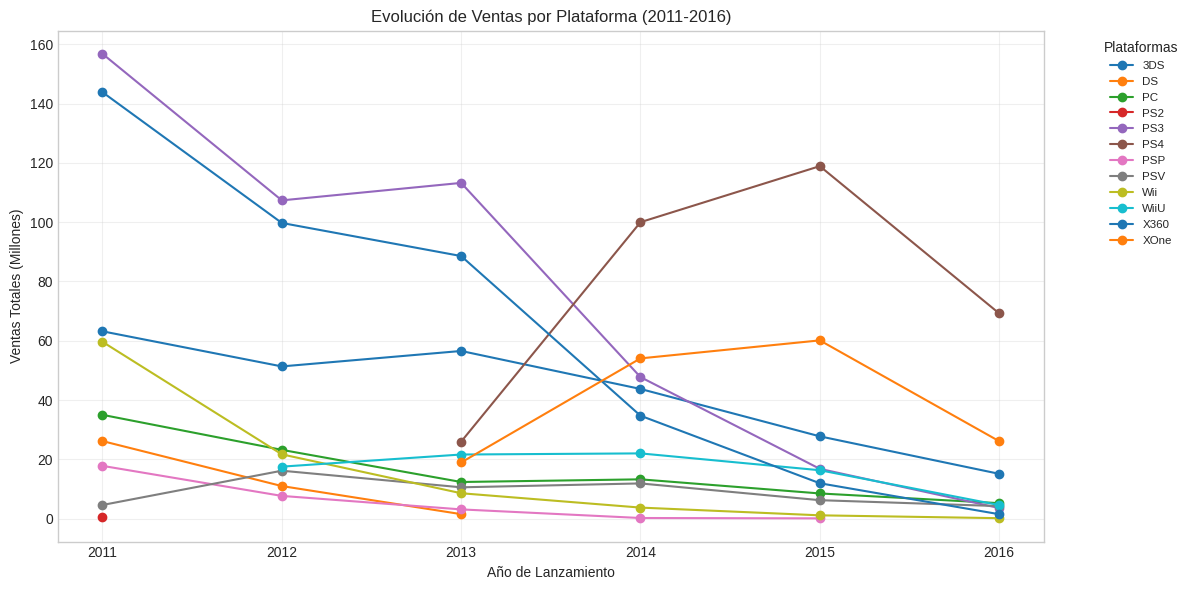

In [35]:
# 1. Agrupación de ventas totales (esto lo tienes bien)
total_sales = df_current.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
print(f"Ventas totales :\n{total_sales}")

# 2. Arreglo del pivot_table: especificamos 'total_sales' para que la leyenda sea limpia
evolution_sales = df_current.pivot_table(index='year_of_release', 
                                         columns='platform', 
                                         values='total_sales', 
                                         aggfunc='sum')

# 3. Graficamos
ax = evolution_sales.plot(figsize=(12, 6), marker='o')

# 4. ARREGLO DE LABELS: Mover leyenda afuera y reducir tamaño
plt.legend(title='Plataformas', 
           bbox_to_anchor=(1.05, 1), # Coordenadas: fuera a la derecha
           loc='upper left', 
           fontsize='small',
           ncol=1) # Puedes poner ncol=2 si la lista es muy larga hacia abajo

plt.title('Evolución de Ventas por Plataforma (2011-2016)')
plt.ylabel('Ventas Totales (Millones)')
plt.xlabel('Año de Lanzamiento')
plt.grid(True, alpha=0.3)

# Ajustar márgenes para que la leyenda no se corte
plt.tight_layout()
plt.show()


### Paso 3.6 Crea un diagrama de caja para las ventas globales de todos los juegos, desglosados por plataforma. ¿Son significativas las diferencias en las ventas? ¿Qué sucede con las ventas promedio en varias plataformas? Describe tus hallazgos.

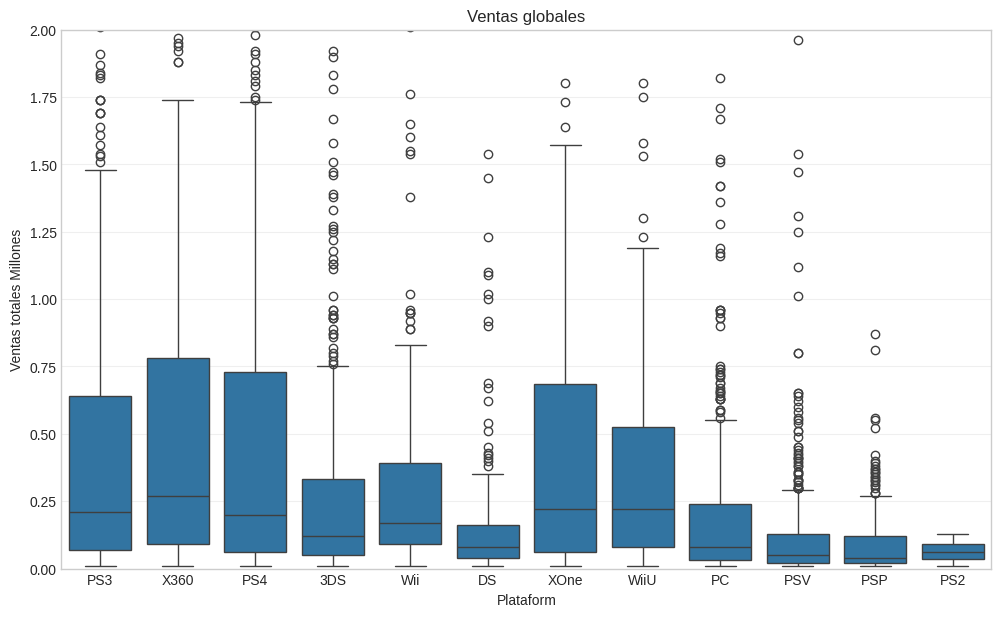

              mean   50%
platform                
3DS       0.503535  0.12
DS        0.210489  0.08
PC        0.251105  0.08
PS2       0.064286  0.06
PS3       0.629336  0.21
PS4       0.801378  0.20
PSP       0.092981  0.04
PSV       0.125431  0.05
Wii       0.482335  0.17
WiiU      0.559116  0.22
X360      0.763815  0.27
XOne      0.645020  0.22


In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(data=df_current, x='platform', y='total_sales')
plt.ylim(0, 2) # Zoom para ver el grueso de los juegos
plt.title("Ventas globales")
plt.xlabel("Plataform")
plt.ylabel("Ventas totales Millones")
plt.grid(axis='y', alpha=0.3)
plt.show()
print(df_current.groupby('platform')['total_sales'].describe()[['mean', '50%']])

* Las platoformas como PS3, X360, PS4, Xone son de sobremesa y contienen un diagrama mas grande lo que seignifica que son mas lucrativas.
* En el caso de PC se vende muchos juegos en cantidades moderadas por el el largo de la cola 

### Paso 3. 7 Mira cómo las reseñas de usuarios y profesionales afectan las ventas de una plataforma popular (tu elección). Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas. Saca conclusiones.

Correlación Críticos/Ventas: 0.23
Correlación Usuarios/Ventas: 0.03


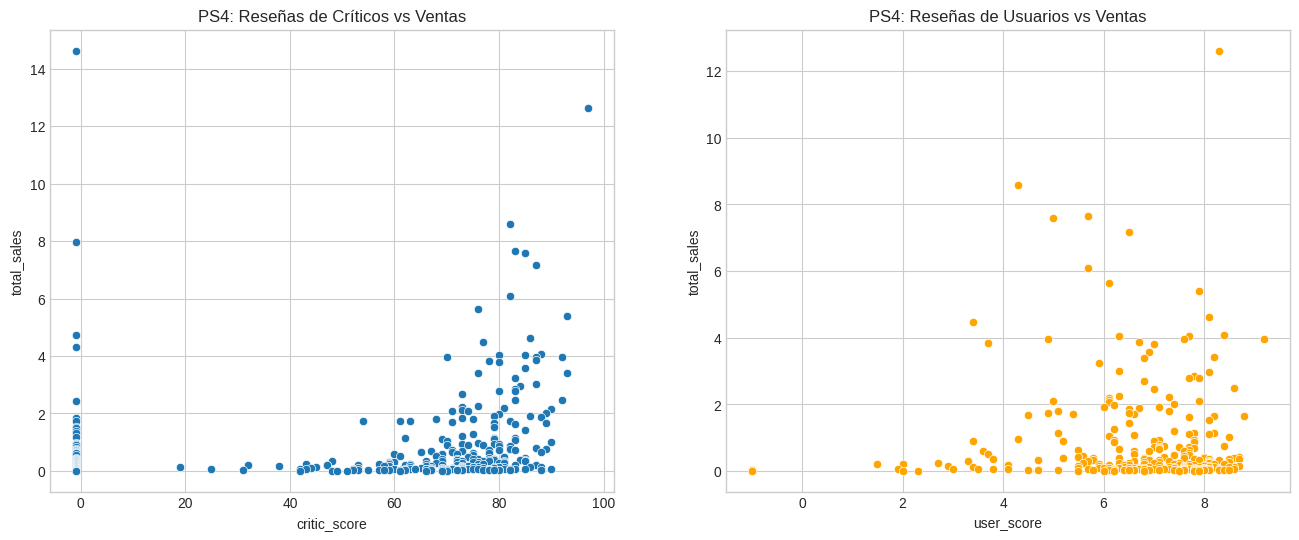

Correlación Críticos/Ventas: 0.32
Correlación Usuarios/Ventas: 0.14


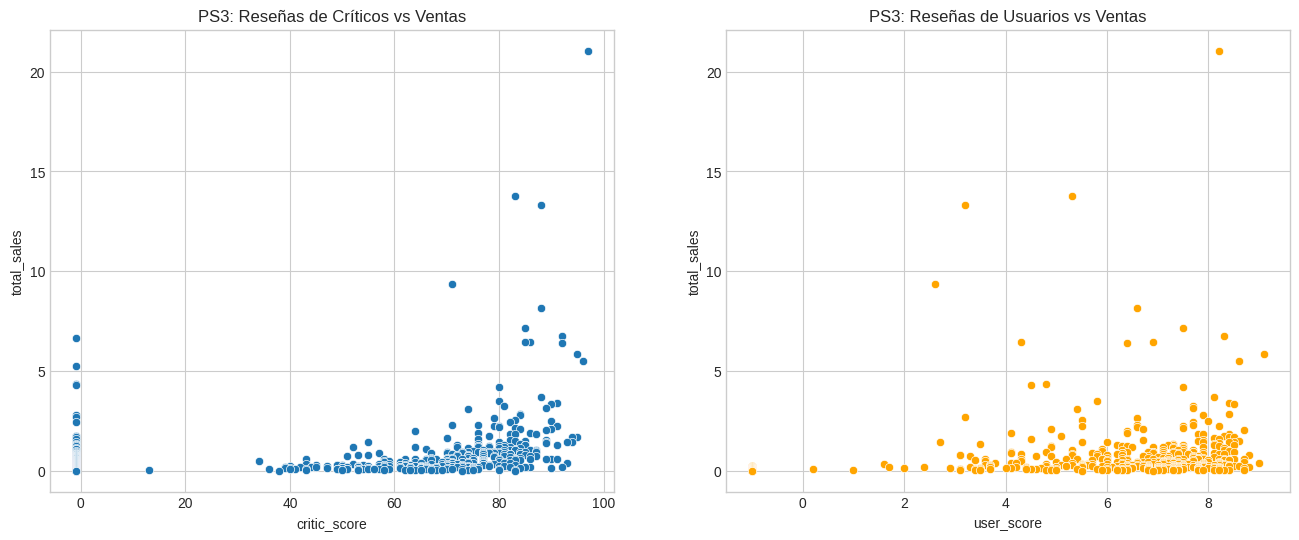

Correlación Críticos/Ventas: 0.23
Correlación Usuarios/Ventas: 0.03


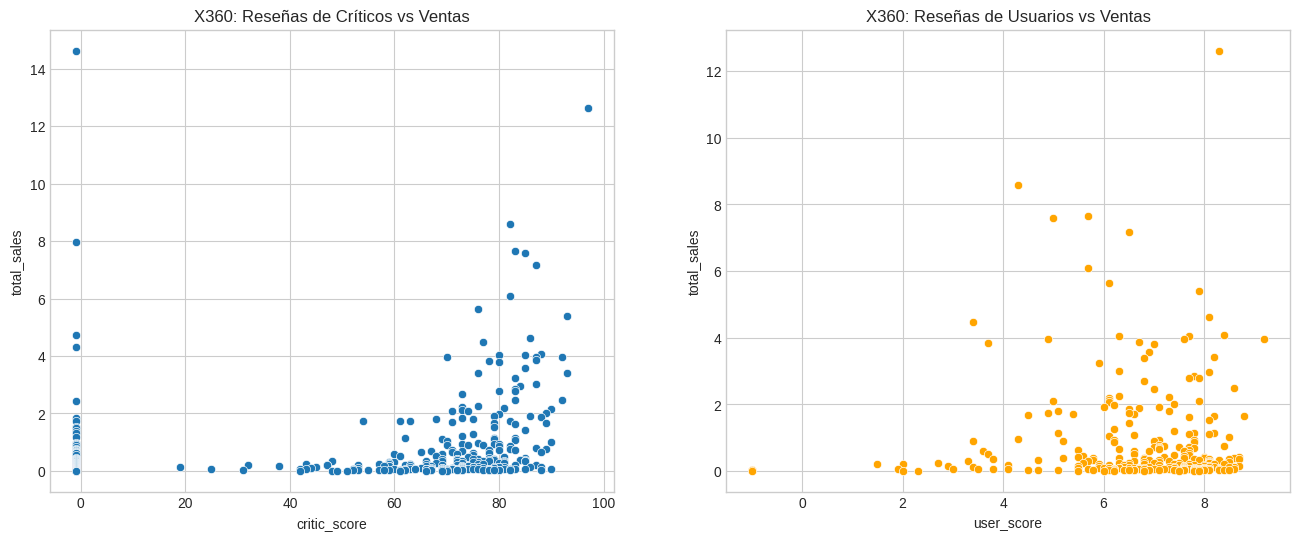

In [37]:
#============================== PS4  =================================
# 1. Filtramos para PS4 y convertimos user_score a número
ps4_data = df_current[df_current['platform'] == 'PS4'].copy()
ps4_data['user_score'] = pd.to_numeric(ps4_data['user_score'], errors='coerce')

#transformamos a numeros la columna user score, el errors obvia el tbd o algo qie no sea un 
# numero y lo transforma NaN

# 2. Calculamos correlaciones (ignorando los valores nulos)
corr_criticos = ps4_data['critic_score'].corr(ps4_data['total_sales'])
# corr, el coeficiente de correralacion de pearson 
# explica si tengo una nota positiva la venta sube, y asi con la baja  o nula 
# este esta en valores de -1 0 1 
corr_usuarios = ps4_data['user_score'].corr(ps4_data['total_sales'])
print(f"Correlación Críticos/Ventas: {corr_criticos:.2f}")
print(f"Correlación Usuarios/Ventas: {corr_usuarios:.2f}")
# 3. Creamos los gráficos de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Gráfico para Críticos
sns.scatterplot(data=ps4_data, x='critic_score', y='total_sales', ax=ax1)
ax1.set_title('PS4: Reseñas de Críticos vs Ventas')
# Gráfico para Usuarios
sns.scatterplot(data=ps4_data, x='user_score', y='total_sales', ax=ax2, color='orange')
ax2.set_title('PS4: Reseñas de Usuarios vs Ventas')
plt.show()
#=====================================PS3================================================
# 1. Filtramos para PS4 y convertimos user_score a número
ps3_data = df_current[df_current['platform'] == 'PS3'].copy()
ps3_data['user_score'] = pd.to_numeric(ps3_data['user_score'], errors='coerce')

#transformamos a numeros la columna user score, el errors obvia el tbd o algo qie no sea un 
# numero y lo transforma NaN

# 2. Calculamos correlaciones (ignorando los valores nulos)
corr_criticos = ps3_data['critic_score'].corr(ps3_data['total_sales'])
# corr, el coeficiente de correralacion de pearson 
# explica si tengo una nota positiva la venta sube, y asi con la baja  o nula 
# este esta en valores de -1 0 1 
corr_usuarios = ps3_data['user_score'].corr(ps3_data['total_sales'])
print(f"Correlación Críticos/Ventas: {corr_criticos:.2f}")
print(f"Correlación Usuarios/Ventas: {corr_usuarios:.2f}")
# 3. Creamos los gráficos de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Gráfico para Críticos
sns.scatterplot(data=ps3_data, x='critic_score', y='total_sales', ax=ax1)
ax1.set_title('PS3: Reseñas de Críticos vs Ventas')
# Gráfico para Usuarios
sns.scatterplot(data=ps3_data, x='user_score', y='total_sales', ax=ax2, color='orange')
ax2.set_title('PS3: Reseñas de Usuarios vs Ventas')
plt.show()
#==========================================x360===================
# 1. Filtramos para PS4 y convertimos user_score a número
x360_data = df_current[df_current['platform'] == 'PS4'].copy()
x360_data['user_score'] = pd.to_numeric(x360_data['user_score'], errors='coerce')

#transformamos a numeros la columna user score, el errors obvia el tbd o algo qie no sea un 
# numero y lo transforma NaN

# 2. Calculamos correlaciones (ignorando los valores nulos)
corr_criticos = x360_data['critic_score'].corr(x360_data['total_sales'])
# corr, el coeficiente de correralacion de pearson 
# explica si tengo una nota positiva la venta sube, y asi con la baja  o nula 
# este esta en valores de -1 0 1 
corr_usuarios = x360_data['user_score'].corr(x360_data['total_sales'])
print(f"Correlación Críticos/Ventas: {corr_criticos:.2f}")
print(f"Correlación Usuarios/Ventas: {corr_usuarios:.2f}")
# 3. Creamos los gráficos de dispersión
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
# Gráfico para Críticos
sns.scatterplot(data=x360_data, x='critic_score', y='total_sales', ax=ax1)
ax1.set_title('X360: Reseñas de Críticos vs Ventas')
# Gráfico para Usuarios
sns.scatterplot(data=x360_data, x='user_score', y='total_sales', ax=ax2, color='orange')
ax2.set_title('X360: Reseñas de Usuarios vs Ventas')
plt.show()

### Conclusiones
1. Tanto las 3 plataformas estan en un intervalo de 0.23 a 0.32, de criticas profesionales y ventas, esto indica que a mayor critica profesional los usuarios tienden a  comprar dichos juegos.
2. La correlacion 0.03 indica que asi tenga pocas resenas de usuarios positivas vende grandes cantidades  esto puede ser ya que sea un juego clasico o secuela que decepciono a los fans

### Paso 3.8 Teniendo en cuenta tus conclusiones compara las ventas de los mismos juegos en otras plataformas.

In [38]:
#utilizamos herramientas de conjuntos
#___________________________________________________________________________________________
#En Python los conjuntos pueden almacenar valores numéricos o de cualquier tipo,
#siempre y cuando los valores sean «hasheables». Los conjuntos son tipos mutables,
#se garantiza que todos sus elementos son únicos, pero no se garantiza que estén ordenados.
#___________________________________________________________________________________________

# 1. Obtenemos la lista única de nombres para cada plataforma
# Usamos set() para que no haya duplicados y la comparación sea rápida
nombres_ps4 = set(df_current[df_current['platform'] == 'PS4']['name'])
# filtramos la columna plataforma por ps4 y nos devuelve solo los true, de eso extraemos el nombre
#set() le trasnforma en un conjunto, sin valores repetidos 
nombres_ps3 = set(df_current[df_current['platform'] == 'PS3']['name'])
nombres_x360 = set(df_current[df_current['platform'] == 'X360']['name'])
nombres_3ds = set(df_current[df_current['platform'] == '3DS']['name'])

# 2. Hallamos la INTERSECCIÓN (lo que está en las 3 al mismo tiempo)
juegos_en_comun = nombres_ps4.intersection(nombres_ps3).intersection(nombres_x360).intersection(nombres_3ds)
#3 tomamos los 3 conjuntos y le vemos la interssion solo lo comun en las 3plataformas
print(f"Cantidad de juegos multiplataforma (PS4, PS3, X360, 3DS): {len(juegos_en_comun)}")

# 3. Filtramos nuestro DataFrame original para que solo contenga esos juegos 
# y solo esas tres plataformas
df_comparativa = df_current[
    (df_current['name'].isin(juegos_en_comun)) & 
    (df_current['platform'].isin(['PS4', 'PS3', 'X360','3DS']))
]

# 4. Creamos una tabla dinámica para ver las ventas lado a lado
tabla_comparativa = df_comparativa.pivot_table(
    index='name', 
    columns='platform', 
    values='total_sales'
)

# Mostramos los primeros 10 resultados
print("\nComparativa de Ventas (Primeros 10 juegos):")
print(tabla_comparativa.head(10))

Cantidad de juegos multiplataforma (PS4, PS3, X360, 3DS): 16

Comparativa de Ventas (Primeros 10 juegos):
platform                                     3DS   PS3   PS4  X360
name                                                              
Adventure Time: Finn & Jake Investigations  0.09  0.08  0.10  0.09
Angry Birds Star Wars                       0.33  0.29  0.22  0.28
FIFA 14                                     0.23  6.46  3.01  4.22
FIFA 15                                     0.46  4.28  6.08  2.92
LEGO Jurassic World                         0.62  0.85  0.90  0.87
LEGO Marvel Super Heroes                    0.89  1.83  1.62  2.22
LEGO Marvel's Avengers                      0.18  0.26  0.73  0.32
LEGO The Hobbit                             0.24  0.46  0.60  0.45
Lego Batman 3: Beyond Gotham                0.45  0.73  0.92  0.89
Lego Star Wars: The Force Awakens           0.13  0.17  0.71  0.12


                 sum  count  median
genre                              
Shooter       402.91    329   0.410
Sports        237.15    389   0.200
Platform       88.68    122   0.185
Fighting       66.90    159   0.180
Racing         88.31    180   0.160
Role-Playing  245.63    465   0.150
Action        557.80   1269   0.130
Misc          139.42    375   0.130
Simulation     50.26    136   0.110
Strategy       22.16    117   0.080
Puzzle          9.85     71   0.050
Adventure      45.04    410   0.030


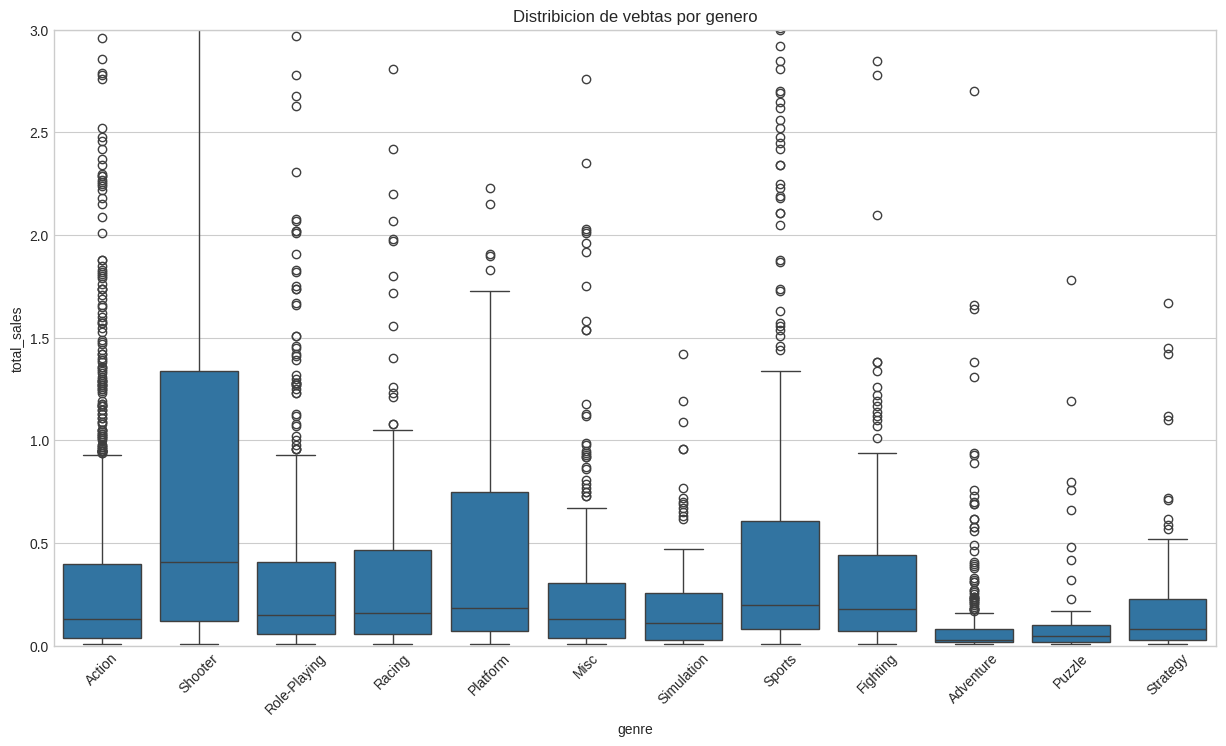

In [39]:
# Análisis de ventas por género
# agrupamos por genero  y extraemos las ventas totales, colocamos las siguientes
# operaciones suma, conteo, promedio
generos = df_current.groupby('genre')['total_sales'].agg(['sum', 'count', 'median']).sort_values(by='median', ascending=False)
print(generos)
plt.figure(figsize=(15,8))
sns.boxplot(data=df_current,x='genre', y='total_sales')
plt.ylim(0,3)
plt.title('Distribicion de vebtas por genero')
plt.xticks(rotation=45)
plt.show()


## Paso 4. Crea un perfil de usuario para cada region para cada region (NA, UE, JP)
### Paso 4.1 Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
### Paso 4.2 Los cinco géneros principales. Explica la diferencia.
### Paso 4.3 Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

--- ANÁLISIS DE LA REGIÓN: NA_SALES ---

Top 5 Plataformas:
platform
X360    226.80
PS3     168.26
PS4     108.74
XOne     93.12
3DS      82.65
Name: na_sales, dtype: float64


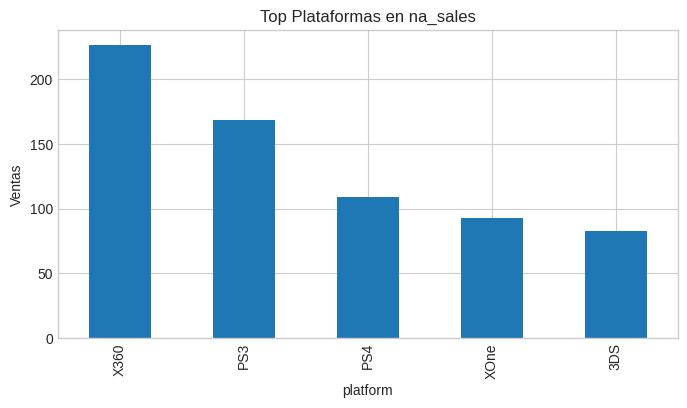


Top 5 Géneros:
genre
Action          230.92
Shooter         194.43
Sports          108.70
Role-Playing     83.78
Misc             69.69
Name: na_sales, dtype: float64


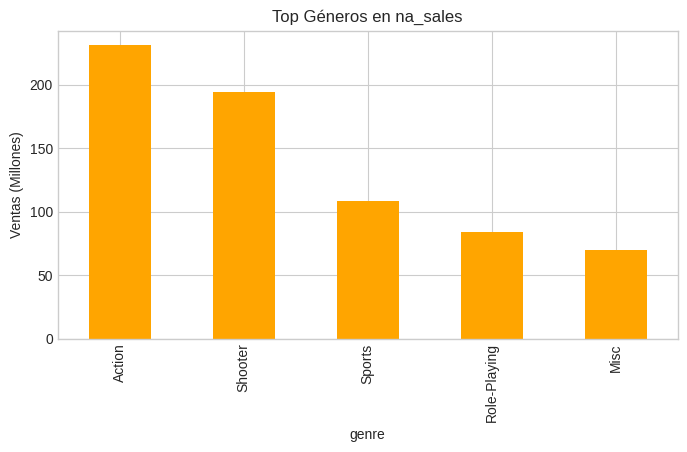


Ventas por clasificación ESRB:
rating
M          308.45
E          170.17
unknown    123.69
E10+       117.72
T          109.31
EC           0.42
RP           0.00
Name: na_sales, dtype: float64


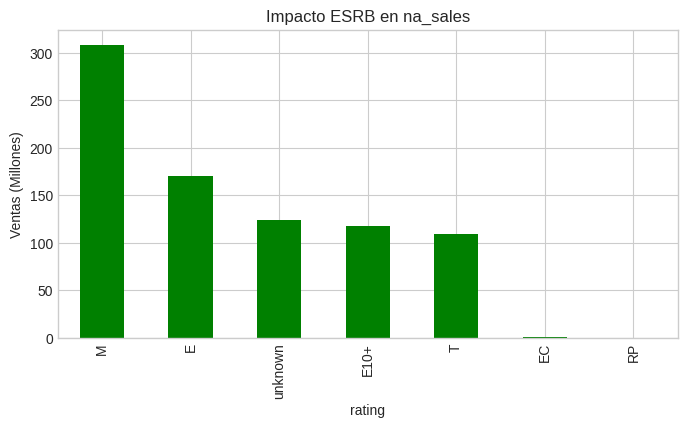

--- ANÁLISIS DE LA REGIÓN: EU_SALES ---

Top 5 Plataformas:
platform
PS3     163.10
PS4     141.09
X360    117.10
3DS      61.27
PC       56.70
Name: eu_sales, dtype: float64


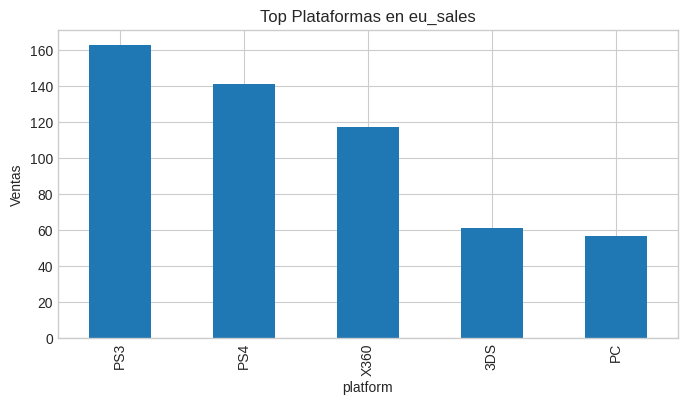


Top 5 Géneros:
genre
Action          199.12
Shooter         148.02
Sports           88.48
Role-Playing     62.30
Racing           40.58
Name: eu_sales, dtype: float64


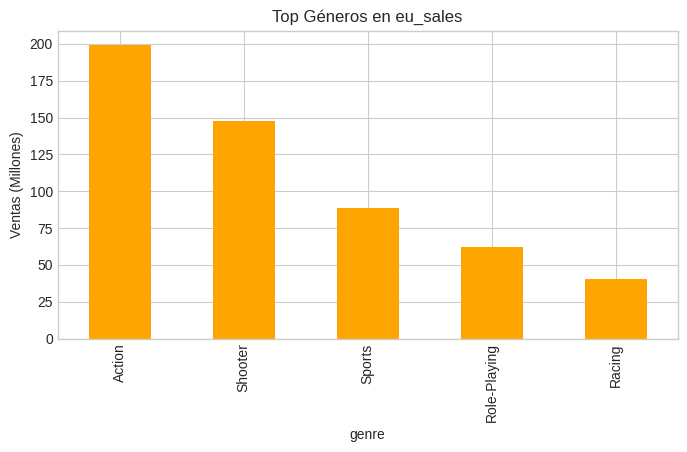


Ventas por clasificación ESRB:
rating
M          250.26
E          141.73
unknown    116.61
T           83.16
E10+        78.00
RP           0.03
EC           0.00
Name: eu_sales, dtype: float64


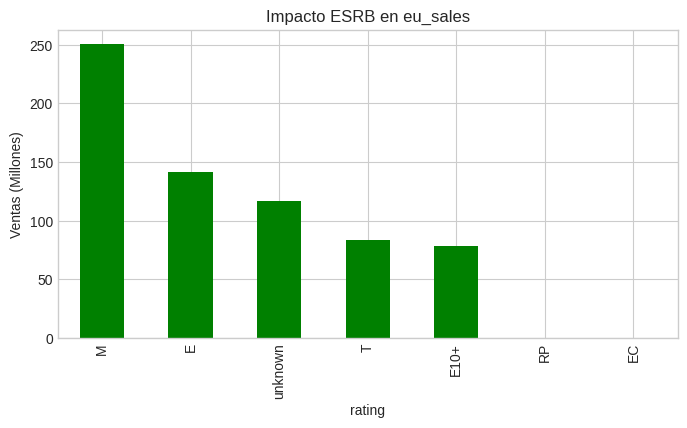

--- ANÁLISIS DE LA REGIÓN: JP_SALES ---

Top 5 Plataformas:
platform
3DS    100.62
PS3     49.39
PSP     24.04
PSV     21.84
PS4     15.96
Name: jp_sales, dtype: float64


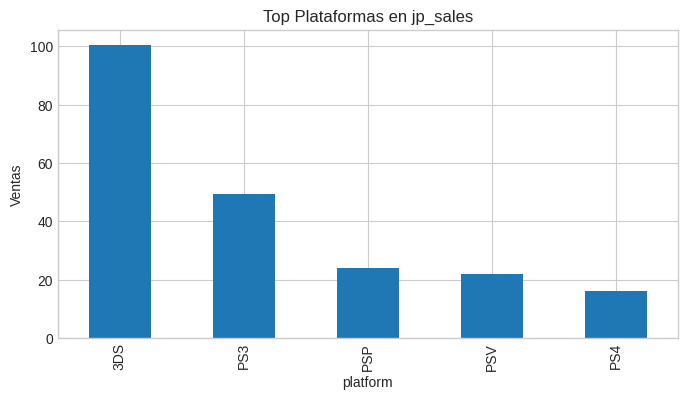


Top 5 Géneros:
genre
Role-Playing    79.87
Action          63.62
Misc            17.60
Fighting        12.38
Platform        12.13
Name: jp_sales, dtype: float64


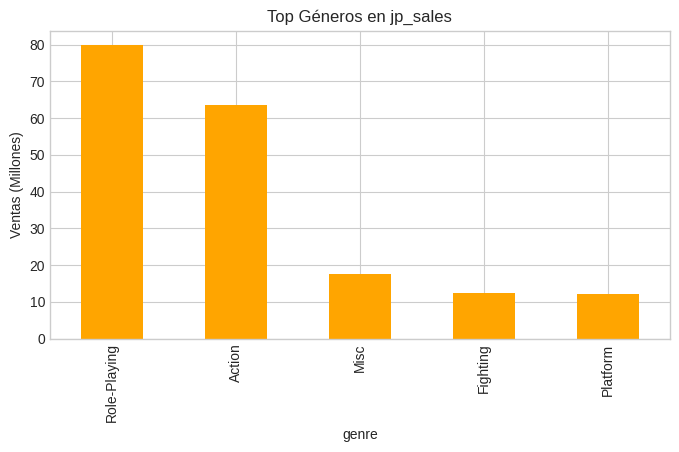


Ventas por clasificación ESRB:
rating
unknown    138.21
E           36.68
T           33.39
M           26.14
E10+        11.23
EC           0.00
RP           0.00
Name: jp_sales, dtype: float64


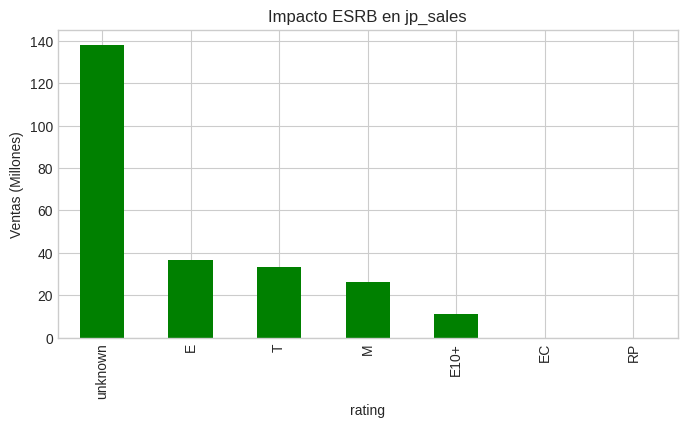

In [40]:
# Paso 4: Perfil de usuario por región
# 1. Definimos las regiones a analizar
regiones = ['na_sales', 'eu_sales', 'jp_sales']
# 2. Aseguramos que los valores nulos en Rating se identifiquen como 'Unknown'
# Esto es vital para ver el impacto en Japón
df_current['rating'] = df_current['rating'].fillna('Unknown')

for region in regiones:
    #paso 4.1===========================================================================
    print(f"--- ANÁLISIS DE LA REGIÓN: {region.upper()} ---")
    
    top_platforms = df_current.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Plataformas:")
    print(top_platforms)
    
    top_platforms.plot(kind='bar', figsize=(8, 4), title=f'Top Plataformas en {region}')
    plt.ylabel('Ventas')
    plt.show()
    #paso 4.2===========================================================================
    top_genres = df_current.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    print("\nTop 5 Géneros:")
    print(top_genres)
    
    top_genres.plot(kind='bar', figsize=(8, 4), color='orange', title=f'Top Géneros en {region}')
    plt.ylabel('Ventas (Millones)')
    plt.show()
    
    # 4.3 Impacto de las clasificaciones de ESRB==========================================
    rating_impact = df_current.groupby('rating')[region].sum().sort_values(ascending=False)
    print("\nVentas por clasificación ESRB:")
    print(rating_impact)
    
    rating_impact.plot(kind='bar', figsize=(8, 4), color='green', title=f'Impacto ESRB en {region}')
    plt.ylabel('Ventas (Millones)')
    plt.show()
    

## Paso 5. Prueba las siguientes hipótesis:

— Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

— Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

Establece tu mismo el valor de umbral alfa.

Explica:

— Cómo formulaste las hipótesis nula y alternativa.

— Qué criterio utilizaste para probar las hipótesis y por qué.

In [42]:
# 1. Definimos el umbral de significancia (alfa)
# Un 5% es el estándar en la industria para aceptar o rechazar hipótesis
alpha = 0.05
# --- PRUEBA 1: Calificaciones de Xbox One vs. PC ---
# Filtramos los datos para obtener solo las puntuaciones de usuarios válidas (sin NaN)
xone_ratings = df_current[(df_current['platform'] == 'XOne') & (df_current['user_score'].notna())]['user_score']
pc_ratings = df_current[(df_current['platform'] == 'PC') & (df_current['user_score'].notna())]['user_score']
# Realizamos la prueba t de muestras independientes
# Usamos equal_var=False porque no podemos asumir que las varianzas son iguales (Prueba de Welch)
results_1 = st.ttest_ind(xone_ratings, pc_ratings, equal_var=False)
print("--- Hipótesis 1: Xbox One vs PC ---")
print(f"p-value: {results_1.pvalue:.4f}")
if results_1.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de los usuarios son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia de que las calificaciones sean diferentes.")


# --- PRUEBA 2: Calificaciones de Acción vs. Deportes ---
# Filtramos los datos por género y eliminamos nulos
action_ratings = df_current[(df_current['genre'] == 'Action') & (df_current['user_score'].notna())]['user_score']
sports_ratings = df_current[(df_current['genre'] == 'Sports') & (df_current['user_score'].notna())]['user_score']

results_2 = st.ttest_ind(action_ratings, sports_ratings, equal_var=False)

print("\n--- Hipótesis 2: Acción vs Deportes ---")
print(f"p-value: {results_2.pvalue}")

if results_2.pvalue < alpha:
    print("Rechazamos la hipótesis nula: Las calificaciones promedio de Acción y Deportes son diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia de diferencia entre los géneros.")

--- Hipótesis 1: Xbox One vs PC ---
p-value: 0.7927
No podemos rechazar la hipótesis nula: No hay evidencia de que las calificaciones sean diferentes.

--- Hipótesis 2: Acción vs Deportes ---
p-value: 7.718088834472571e-12
Rechazamos la hipótesis nula: Las calificaciones promedio de Acción y Deportes son diferentes.


### Paso 6 Conclusion final 


* El análisis demuestra que para tener éxito en 2017, la tienda Ice debe priorizar las plataformas de nueva generación, específicamente **PS4 y Xbox One** en Occidente, y la **Nintendo 3DS** en Japón. Se identificó que las consolas tienen un ciclo de vida de 7 a 10 años, y para este periodo, los géneros de **Shooter y Sports** son los más rentables por título individual, a pesar de que el género de Acción acumula el mayor volumen total de ventas debido a su saturación en el mercado.

* Un hallazgo crítico es que las **reseñas de críticos profesionales** tienen un impacto moderado en las ventas, mientras que las calificaciones de los usuarios no muestran una correlación real. Además, el perfil del consumidor varía drásticamente por región: mientras que en Norteamérica y Europa predominan los juegos para adultos (Rating M) y de sobremesa, en Japón el mercado está liderado por las consolas portátiles y el género **Role-Playing**, donde el sistema de clasificación ESRB es menos influyente.

* Finalmente, las pruebas de hipótesis confirmaron que no existe diferencia significativa en la satisfacción de los usuarios entre Xbox One y PC, pero sí existe una diferencia clara entre los géneros de Acción y Deportes. En conclusión, una estrategia ganadora para 2017 debe centrarse en títulos de **PS4 con altas valoraciones de la crítica especializada**, adaptando la oferta de géneros según las preferencias culturales de cada mercado regional.